# Introduction
This lecture focuses on the parameter estimate and classification using 
traditional methods and machine learning algorithms.
It is highly recommended to take a dedicated course on probability and statistics. 
Book **Data Analysis in High Energy Physics** (ISBN 978-3-527-41058-3) is very useful and highly recommended.
This lecture trys to follow statistical methods employed in the ATLAS experiment at LHC, 
which may be different in other field. To further understand general statistical methods empolied at the LHC, Haichen's talk is strong recommended: [link](https://indico.cern.ch/event/728857/contributions/3002052/attachments/1650276/2639026/group_meeting_talk.pdf).

## Recap some terminologies

* *confidence level*: 
* *variance*: the expectation of the squared deviation of a random variable from its mean. $\sigma^{2}_{x}$ = Var(X) = $<X^2> - <X>^2$. $\braket{0|0}$
* *covariance*:


# Parameter Estimate

The estimate of parameters from observed distributions, a process also called *fitting*, is one of the fundamental data analysis tasks in experimental high energy physics. Parameter estimation consists of two basic ingredients: the estimation of the best approximation of the true parameter values ("best guess"), and the estimtion of the *uncertainties* of the estimated parameters, which are usually expressed as *confidence intervals*. The two commonly used *frequentist* approaches to parameter estimation, namely the methods of *least squares* and *maximum likelihood*.

Covariance matrix:

# Classification
From data analysis point of view, the major goal is to separate signal events from background events, which happens throughout all stages of analysis designs: 
 * event triggers, 
 * object reconstruction and identification, 
 * event selections.
 
A simple way to achieve this goal is to find **variables that can separate signal from background** and then place a *criteria* on the variables.
The criteria could be optimized based on certain merits, such as $S/\sqrt{B}$, where $S$ ($B$) is number of signal (background) events.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
nsig = 3000
nbkg = 5000

In [3]:
signal = np.random.normal(10, 2, nsig)
background = np.random.normal(16, 3, nbkg)

AttributeError: module 'matplotlib.pyplot' has no attribute 'savefi'

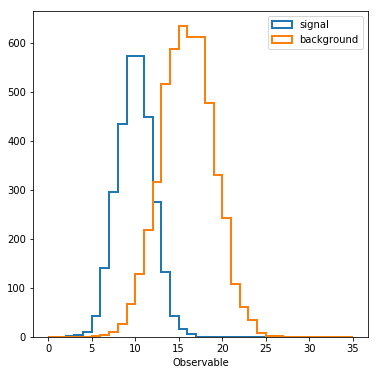

In [4]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
x_range = (0, 35)
nbins = 35
hist_s, bins, _ = ax.hist(signal, histtype='step', bins=nbins, range=x_range, lw=2, label='signal')
hist_b, bins, _ = ax.hist(background, histtype='step', bins=nbins, range=x_range, lw=2, label='background')
ax.set_xlabel("Observable")
ax.legend()
plt.savefig("")

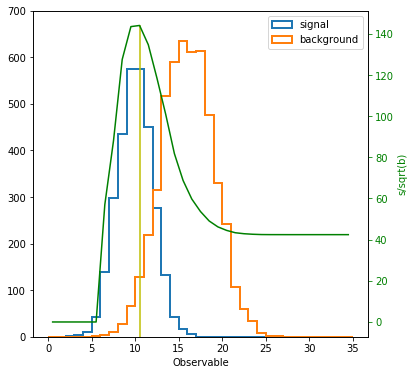

In [6]:
soverb = []
cuts = []
for ibin in range(len(hist_s)):
    s = sum(hist_s[0:ibin])
    b = sum(hist_b[0:ibin])
    merit = s/math.sqrt(b) if abs(b) > 1e-6 else 0
    soverb.append(merit)
    cuts.append(bins[ibin])
    
x_vals = [0.5*(bins[i+1] - bins[i])+bins[i] for i in range(len(bins)-1)]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.hist(signal, histtype='step', bins=nbins, range=x_range, lw=2, label='signal')
ax.hist(background, histtype='step', bins=nbins, range=x_range, lw=2, label='background')
ax.set_xlabel("Observable")

ax2 = ax.twinx()
ax2.plot(x_vals, soverb, label='s/sqrt(b)', color='g')
ax2.tick_params('y', colors='g')
ax2.set_ylabel('s/sqrt(b)', color='g')

ax.legend();

imax_bin = np.argmax(soverb)
opt_cut = cuts[imax_bin] + 0.5*(cuts[imax_bin+1] - cuts[imax_bin])
ax.plot([opt_cut, opt_cut], list(ax.get_ylim()), color='y')
plt.savefig("cut_based_opt.eps")

In [7]:
print(opt_cut)

10.5


In [1]:
import ROOT

ModuleNotFoundError: No module named 'ROOT'

In [ ]:
ROO